## PROBLEM STATEMENT
X-Education, an education company which sells online courses to industry professionals collects leads through various sources. The lead conversion rate is only around 30% .The company wants to make the process efficient by identifying the most potential leads and increase the conversion rate.The company requires us to build a model wherein we need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Objectives
- To build a logistic regression model which would assign a score between 0 and 100 to the leads.High score denotes a hot lead and a low score denotes a cold lead.
- To handle problems which may arise due to the company’s requirement changes.


## Reading the data

In [1]:
#Importing all the necessary libraries
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import precision_recall_curve

In [2]:
#Reading the dataset
leads = pd.read_csv("Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
#Checking the number of rows and columns
leads.shape

(9240, 37)

In [4]:
#Checking the datatype of the columns
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
#Obtaining statistical information on the numerical data
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


#### It can be seen that some columns have null values and there are also outliers in the numerical columns which have to be treated.

# DATA CLEANING

In [6]:
#Checking the percentage of null values
round(100*(leads.isnull().sum()/len(leads)),2).sort_values(ascending = False)

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

#### We can see that there are some columns which have a high percentage of null values greater than 45%.Imputing such a large amount of null values would interfere with the originality of the data.Hence it is better to drop these columns.

In [7]:
#Dropping all columns having null values greater than 45%
for col in leads.columns:
    if (leads[col].isnull().sum()/len(leads)) > 0.45:
        leads.drop(col,inplace=True,axis=1)

In [8]:
#Checking the remaining percentage of null values
round(100*(leads.isnull().sum()/len(leads)),2).sort_values(ascending=False)

Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
Update me on Supply Chain Content                 0.00
Prospect ID                                       0.00
Digital Advertisement                             0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free cop

### The remaining columns having null values can be imputed with suitable values or dropped if not necessary.We proceed with the analysis by checking each column.

### Tags

In [9]:
#Checking the values in the Tags column
leads["Tags"].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

#### We can see that there are some values which come under the same category."Ringing","switched off","Busy","invalid number","wrong number given","opp hangup","number not provided" all indicate that the customer was not able to be reached through phone.Hence all these can be categorized as "Not Reachable"."Closed by Horizzon","Lost to EINS","in touch with EINS","Lost to Others" can be grouped under lost to others."Diploma holder (Not Eligible)","University not recognized","Recognition issue (DEC approval)" as Not Eligible,"Still Thinking","Want to take admission but has financial problems","In confusion whether part time or DLP" as Undecided and "Interested in Next batch","Shall take in the next coming month" as "Next batch".The null values can be imputed as "Not specified"

In [10]:
#Groupng similar values and imputing null values  
leads.Tags = leads.Tags.replace(["Ringing","switched off","Busy","invalid number","wrong number given","opp hangup","number not provided"],"Not Reachable")
leads.Tags = leads.Tags.replace(["Closed by Horizzon","Lost to EINS","in touch with EINS","Lost to Others"],"Lost to others")
leads.Tags = leads.Tags.replace(["Diploma holder (Not Eligible)","University not recognized","Recognition issue (DEC approval)"],"Not Eligible")
leads.Tags = leads.Tags.replace(["Still Thinking","Want to take admission but has financial problems","In confusion whether part time or DLP"],"Undecided")
leads.Tags = leads.Tags.replace(["Interested in Next batch","Shall take in the next coming month"],"Next_batch")
leads.Tags.fillna("Not Specified",inplace=True)


In [11]:
#Checking Tags column
leads.Tags.value_counts()

Not Specified                          3353
Will revert after reading the email    2072
Not Reachable                          1819
Lost to others                          552
Interested in other courses             513
Already a student                       465
Not doing further education             145
Interested  in full time MBA            117
Graduation in progress                  111
Not Eligible                             66
Undecided                                17
Next_batch                                7
Lateral student                           3
Name: Tags, dtype: int64

### City

In [12]:
#Checking the city column
leads.City.value_counts(dropna=False)

Mumbai                         3222
Select                         2249
NaN                            1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

#### We can see that about 34.8% of the leads belong to Mumbai and about 39.71% are indicated as "Select" which means no value was entered by the customer.Both of these constitute a major chunk of the values in the column indicating that the data is highly skewed.Hence this column can be dropped.

In [13]:
#Dropping City column
leads.drop("City",inplace = True,axis=1)

### Lead Profile

In [14]:
#Checking leads profile column
leads["Lead Profile"].value_counts(dropna=False)

Select                         4146
NaN                            2709
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

#### We can see that there are a lot of values indicated as Select which are actually null values.Hence they can be replaced as null values.

In [15]:
#Replacing Select values as Null values
leads["Lead Profile"].replace("Select",np.NaN,inplace=True)

### What matters most to you in choosing a course

In [16]:
#Checking "What matters most to you in choosing a course" column
leads["What matters most to you in choosing a course"].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

#### We can see that this column is skewed towards Better Career Prospects and hence can be dropped

In [17]:
#Dropping the column
leads.drop("What matters most to you in choosing a course",inplace=True,axis=1)

### Occupation

In [18]:
#Checking the Occupation column
leads["What is your current occupation"].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [19]:
#Imputing null values with "Other"
leads["What is your current occupation"].fillna("Others",inplace=True)

In [20]:
#Replacing "Other" with "Others"
leads["What is your current occupation"]=leads["What is your current occupation"].replace("Other","Others")

In [21]:
#Checking the column
leads["What is your current occupation"].value_counts(dropna=False)

Unemployed              5600
Others                  2706
Working Professional     706
Student                  210
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

### Country

In [22]:
#Checking the "Country" column
leads["Country"].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
South Africa               4
Germany                    4
Canada                     4
Kuwait                     4
Nigeria                    4
Sweden                     3
Belgium                    2
Italy                      2
Netherlands                2
Philippines                2
Asia/Pacific Region        2
Bangladesh                 2
China                      2
Ghana                      2
Uganda                     2
Malaysia                   1
Denmark                    1
Switzerland                1
Indonesia                  1
Russia                     1
Tanzania      

#### It can be observed that more than 50% of the students belong to India and the remaining are distributed among countries outside India.Hence these countries can be grouped under a category called "Other Countries" for better analysis and visualisation.As the most common country present is "India" we can impute the null values also with "India".

In [23]:
#Grouping countries outside India as "Other Countries"
leads['Country'] = leads['Country'].apply(lambda x: 'India' if x=='India' else 'Other Countries')
leads['Country'].fillna("India",inplace=True)

In [24]:
#Checking the country column
leads['Country'].value_counts(dropna=False)

India              6492
Other Countries    2748
Name: Country, dtype: int64

### "How did you hear about X Education"

In [25]:
#Checking "How did you hear about X Education" column
leads["How did you hear about X Education"].value_counts(dropna=False)

Select                   5043
NaN                      2207
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

#### The values represented as "Select" can be replaced with null values.

In [26]:
#Replacing Select values with Null values
leads["How did you hear about X Education"].replace("Select",np.NaN,inplace=True)

### Specialization

In [27]:
#Checking the column "Specialization"
leads.Specialization.value_counts(dropna=False)

Select                               1942
NaN                                  1438
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

#### There are a lot of specialisations belonging to management which can be merged.The null values in this column can be imputed with "Unknown" .

In [28]:
#Replacing null values with "Unknown" and merging all management specializations as MBA specializations.
leads.Specialization.fillna("Unknown",inplace=True)
leads.Specialization = leads.Specialization.replace(["Finance Management","Human Resource Management","Marketing Management","Operations Management","IT Projects Management","Supply Chain Management","Healthcare Management","Hospitality Management","Retail Management","Business Administration"],"MBA Specializations")

In [29]:
leads["Specialization"].replace("Select",np.NaN,inplace=True)
leads.Specialization.fillna("Unknown",inplace=True)

In [30]:
leads.Specialization.value_counts()

MBA Specializations                  4656
Unknown                              3380
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
E-COMMERCE                            112
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

### Total Visits

In [31]:
#Checking the "Total Visits" column
leads["TotalVisits"].value_counts(dropna=False)

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
NaN       137
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
23.0        6
21.0        6
24.0        5
27.0        5
25.0        5
22.0        3
28.0        2
29.0        2
26.0        2
141.0       1
41.0        1
55.0        1
115.0       1
32.0        1
54.0        1
42.0        1
251.0       1
74.0        1
43.0        1
30.0        1
Name: TotalVisits, dtype: int64

#### The null values in this column indicate that the customers have not visited the website and can be imputed with 0.0

In [32]:
#Imputing null values with 0.0
leads["TotalVisits"].fillna("0.0",inplace=True)

### Page Views Per Visit

In [33]:
#Checking the page views per visit column
leads["Page Views Per Visit"].value_counts(dropna=False)

0.00     2189
2.00     1795
3.00     1196
4.00      896
1.00      651
         ... 
3.57        1
1.93        1
2.57        1
12.33       1
2.86        1
Name: Page Views Per Visit, Length: 115, dtype: int64

#### The null values in the column indicate that the customer has not visited any page on the website and hence can be imputed with 0.00

In [34]:
#Imputing null values with 0.00
leads["Page Views Per Visit"].fillna("0.00",inplace=True)

### Last Activity

In [35]:
#Checking the Last Activity column
leads["Last Activity"].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

#### The null values in the column indicate that there was no activity done by the customer and hence can be imputed with "None"

In [36]:
#Imputing null values with "None"
leads["Last Activity"].fillna("None",inplace=True)

### Lead Source

In [37]:
#Checking the lead source column
leads["Lead Source"].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
youtubechannel          1
Pay per Click Ads       1
welearnblog_Home        1
testone                 1
blog                    1
WeLearn                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

#### In this column some values like "google" and "WeLearn" are repeated and therefore they can be merged into one category.The null values in this column can be imputed with the most common value which is "Google"

In [38]:
#Merging repeated values and imputing null values with Google
leads["Lead Source"]=leads["Lead Source"].replace(["Google","google"],"Google")
leads["Lead Source"]=leads["Lead Source"].replace(["WeLearn","welearnblog_Home"],"WeLearn")
leads["Lead Source"].fillna("Google",inplace=True)

In [39]:
#Checking the column again
leads["Lead Source"].value_counts(dropna=False)

Google               2909
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
WeLearn                 2
Pay per Click Ads       1
youtubechannel          1
testone                 1
NC_EDM                  1
blog                    1
Name: Lead Source, dtype: int64

### Prospect ID
#### In the dataset there are two columns Lead Number and Prospect ID which serve as IDs for the customers.Hence the column Prospect ID can be dropped as it is redundant.Lead Number can be used to identify the customers

In [40]:
#Dropping Prospect ID column
leads.drop("Prospect ID",inplace=True,axis=1)

In [41]:
#Checking percentage of null values
round(100*(leads.isnull().sum()/len(leads)),2).sort_values(ascending=False)

How did you hear about X Education          78.46
Lead Profile                                74.19
Lead Number                                  0.00
Magazine                                     0.00
A free copy of Mastering The Interview       0.00
I agree to pay the amount through cheque     0.00
Get updates on DM Content                    0.00
Update me on Supply Chain Content            0.00
Tags                                         0.00
Receive More Updates About Our Courses       0.00
Through Recommendations                      0.00
Digital Advertisement                        0.00
Newspaper                                    0.00
X Education Forums                           0.00
Newspaper Article                            0.00
Search                                       0.00
Lead Origin                                  0.00
What is your current occupation              0.00
Specialization                               0.00
Country                                      0.00


#### We can see that two columns "How did you hear about X Education","Lead Profile" have high percentage of null values and hence can be dropped.

In [42]:
#Dropping the two columns
leads.drop(["How did you hear about X Education","Lead Profile"],inplace=True,axis=1)

In [43]:
#hecking the percentage of null values
round(100*(leads.isnull().sum()/len(leads)),2).sort_values(ascending=False)

Lead Number                                 0.0
Magazine                                    0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Tags                                        0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Search                                      0.0
Lead Origin                                 0.0
What is your current occupation             0.0
Specialization                              0.0
Country                                     0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website             

#### Thus all the null values have been treated and the dataset can be used for further analysis

### Treating columns having Binary values

In [44]:
#Checking for unique values
for cols in leads.columns:
    print(cols)
    print("Unique values: ",leads[cols].nunique())

Lead Number
Unique values:  9240
Lead Origin
Unique values:  5
Lead Source
Unique values:  19
Do Not Email
Unique values:  2
Do Not Call
Unique values:  2
Converted
Unique values:  2
TotalVisits
Unique values:  42
Total Time Spent on Website
Unique values:  1731
Page Views Per Visit
Unique values:  115
Last Activity
Unique values:  18
Country
Unique values:  2
Specialization
Unique values:  10
What is your current occupation
Unique values:  6
Search
Unique values:  2
Magazine
Unique values:  1
Newspaper Article
Unique values:  2
X Education Forums
Unique values:  2
Newspaper
Unique values:  2
Digital Advertisement
Unique values:  2
Through Recommendations
Unique values:  2
Receive More Updates About Our Courses
Unique values:  1
Tags
Unique values:  13
Update me on Supply Chain Content
Unique values:  1
Get updates on DM Content
Unique values:  1
I agree to pay the amount through cheque
Unique values:  1
A free copy of Mastering The Interview
Unique values:  2
Last Notable Activity
Uni

#### We can see that the columns "Magazine","Receive More Updates About Our Courses","Update me on Supply Chain Content","Get updates on DM Content" and "I agree to pay the amount through cheque" have only one unique value.These columns will not help in the prediction of the target variable as they have no variance in the data. 

In [45]:
#Dropping columns with only 1 unique value
leads.drop(columns=leads.columns[leads.nunique()==1],inplace=True)

In [46]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Lead Number                             9240 non-null   int64 
 1   Lead Origin                             9240 non-null   object
 2   Lead Source                             9240 non-null   object
 3   Do Not Email                            9240 non-null   object
 4   Do Not Call                             9240 non-null   object
 5   Converted                               9240 non-null   int64 
 6   TotalVisits                             9240 non-null   object
 7   Total Time Spent on Website             9240 non-null   int64 
 8   Page Views Per Visit                    9240 non-null   object
 9   Last Activity                           9240 non-null   object
 10  Country                                 9240 non-null   object
 11  Spec

#### The remaining binary columns should be checked to see if they have good variance so that they do not affect the analysis

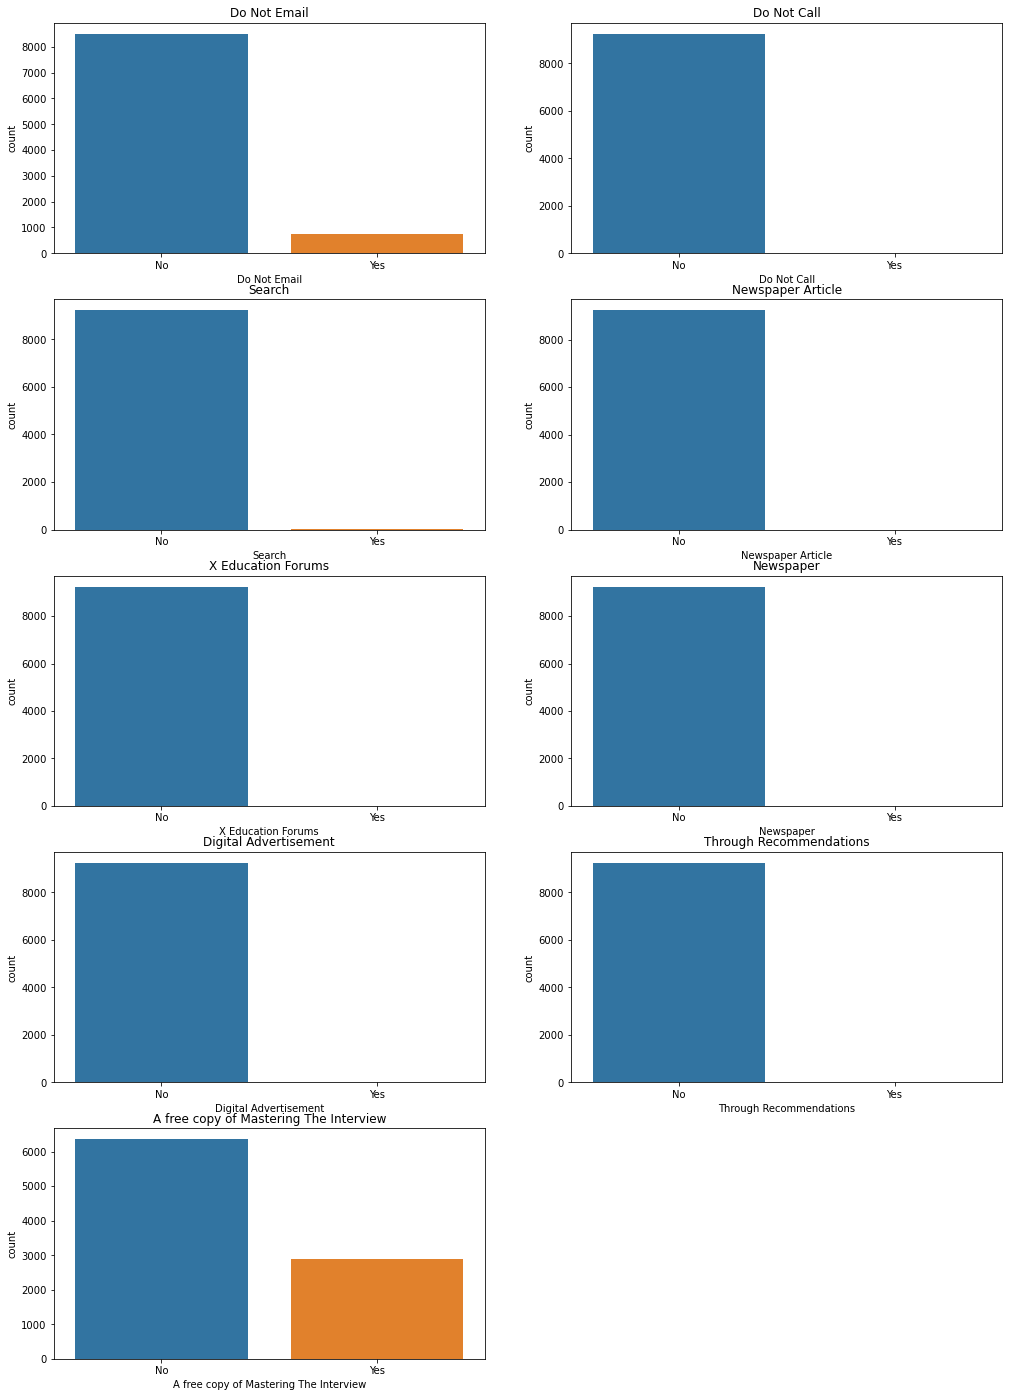

In [47]:
#Visualising the remaining binary columns
binary_columns = ["Do Not Email","Do Not Call","Search","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement","Through Recommendations","A free copy of Mastering The Interview"]
plt.figure(figsize=(17,50))
for col,count in zip(binary_columns,range(len(binary_columns))):
                     plt.subplot(10,2,count+1)
                     sns.countplot(x=col,data=leads)
                     plt.title(col)

#### It can be observed from the above graphs that some of these binary columns show very low variance.These columns do not have any impact on the target variable.Keeping these columns would delay the process of fitting the model and hence they can be dropped.

In [48]:
#Dropping columns which show very low variance in the data
cols_to_drop = ["Do Not Email","Do Not Call","Search","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement","Through Recommendations"]
leads.drop(cols_to_drop,inplace=True,axis=1)

#### The last notable activity column represents the activity performed by the student which is almost the same as Last Activity.As this column does not give any new information this column can be dropped.

In [49]:
#Dropping the last notable acitivity column
cols_to_drop =["Last Notable Activity"]
leads.drop(cols_to_drop,inplace=True,axis=1)

In [50]:
#Checking the remaining columns
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Lead Number                             9240 non-null   int64 
 1   Lead Origin                             9240 non-null   object
 2   Lead Source                             9240 non-null   object
 3   Converted                               9240 non-null   int64 
 4   TotalVisits                             9240 non-null   object
 5   Total Time Spent on Website             9240 non-null   int64 
 6   Page Views Per Visit                    9240 non-null   object
 7   Last Activity                           9240 non-null   object
 8   Country                                 9240 non-null   object
 9   Specialization                          9240 non-null   object
 10  What is your current occupation         9240 non-null   object
 11  Tags

## Visualizing categorical data

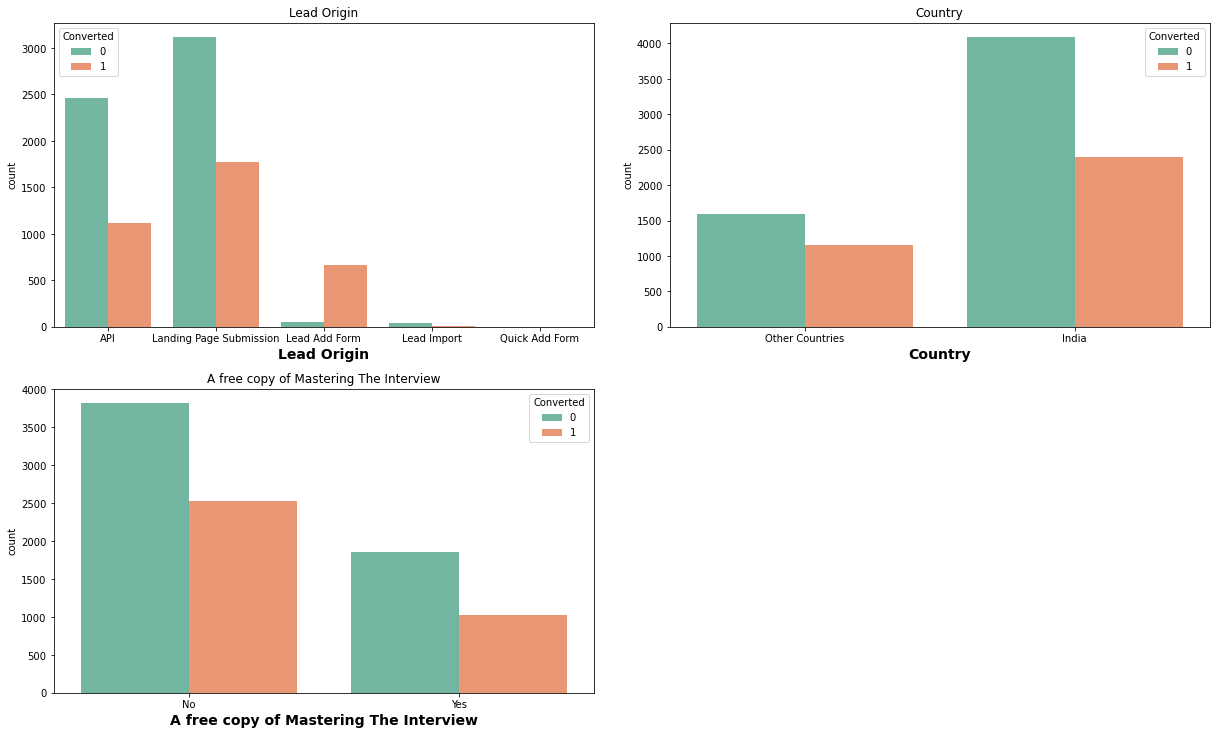

In [51]:
#Visualising the remaining Categorical columns
cat_columns = ['Lead Origin','Country','A free copy of Mastering The Interview']
plt.figure(figsize=(17,20))
sns.set_palette("Set2")
sns.plotting_context(font_scale=1.5)
for col,count in zip(cat_columns,range(len(cat_columns))):
                     plt.subplot(4,2,count+1)
                     plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=2.5, hspace=2.5)
                     sns.countplot(x=col,hue='Converted',data=leads)
                     plt.xlabel(col,fontdict={'fontsize': 14, 'fontweight': "bold"})
                     plt.title(col)
plt.tight_layout()

#### Leads which originated from “Landing page submission” have high conversion rate but people who are not converted are comparatively high.
#### Customers from India show higher conversion rates compared to Other countries.

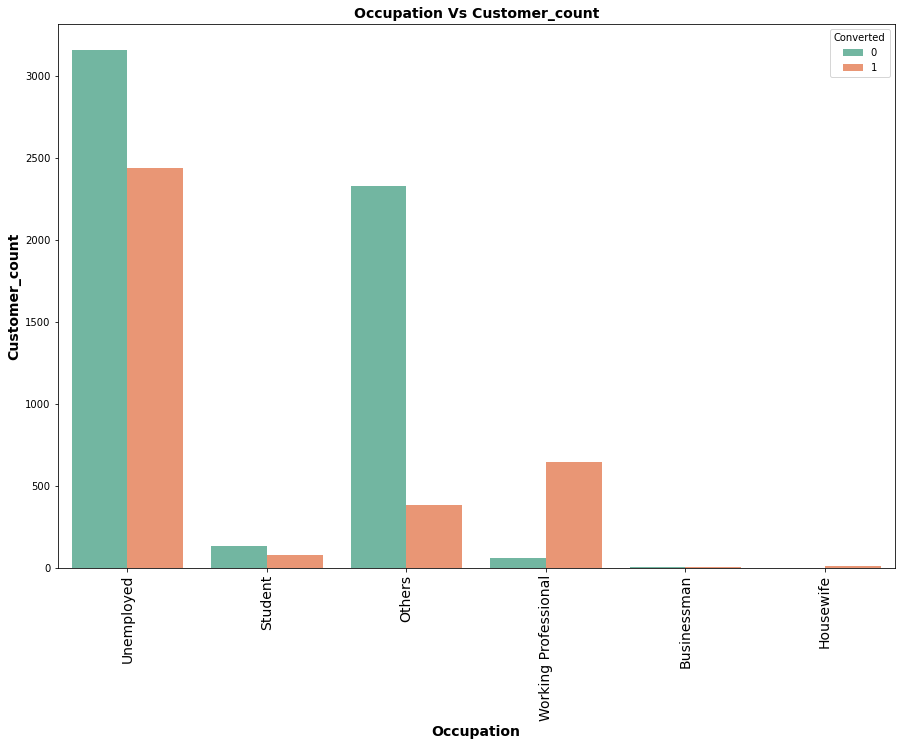

In [52]:
plt.figure(figsize=(15,10))
s1=sns.countplot(leads['What is your current occupation'], hue=leads.Converted,data=leads)
sns.set_palette("Set2")
s1.set_xticklabels(s1.get_xticklabels(),rotation=90,fontsize=14)
plt.xlabel("Occupation",fontdict={'fontsize': 14, 'fontweight': "bold"})
plt.ylabel("Customer_count",fontdict={'fontsize': 14, 'fontweight': "bold"})
plt.title("Occupation Vs Customer_count",fontdict={'fontsize': 14, 'fontweight': "bold"})
plt.show()

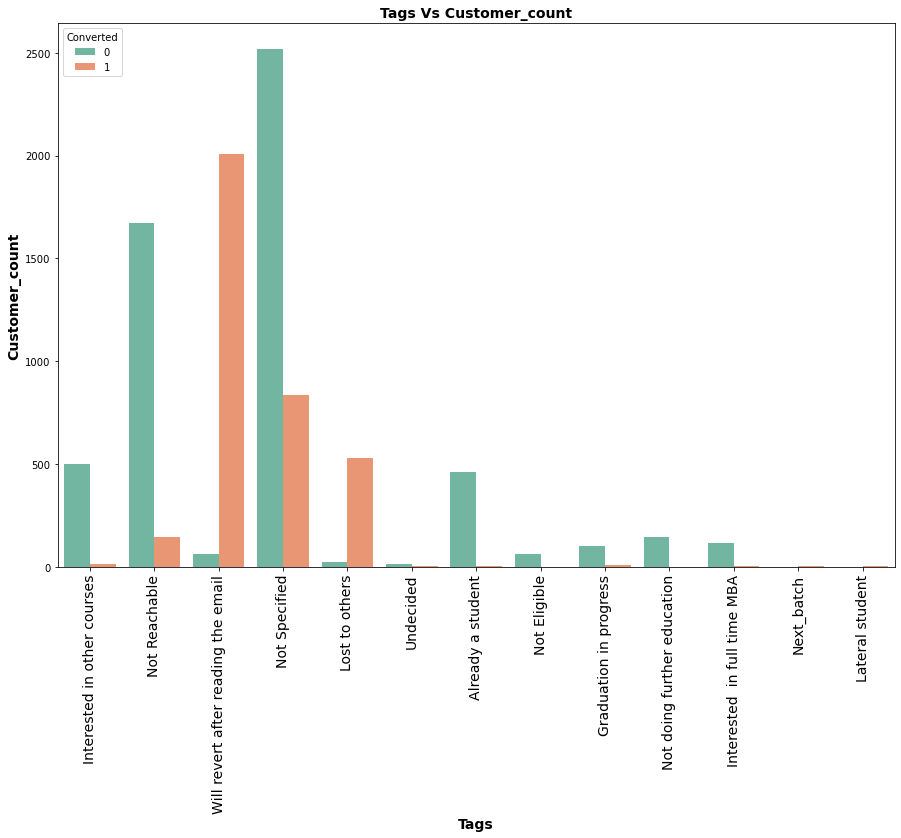

In [53]:
plt.figure(figsize=(15,10))
s1=sns.countplot(leads['Tags'], hue=leads.Converted,data=leads)
sns.set_palette("Set2")
s1.set_xticklabels(s1.get_xticklabels(),rotation=90,fontsize=14)
plt.xlabel("Tags",fontdict={'fontsize': 14, 'fontweight': "bold"})
plt.ylabel("Customer_count",fontdict={'fontsize': 14, 'fontweight': "bold"})
plt.title("Tags Vs Customer_count",fontdict={'fontsize': 14, 'fontweight': "bold"})
plt.show()

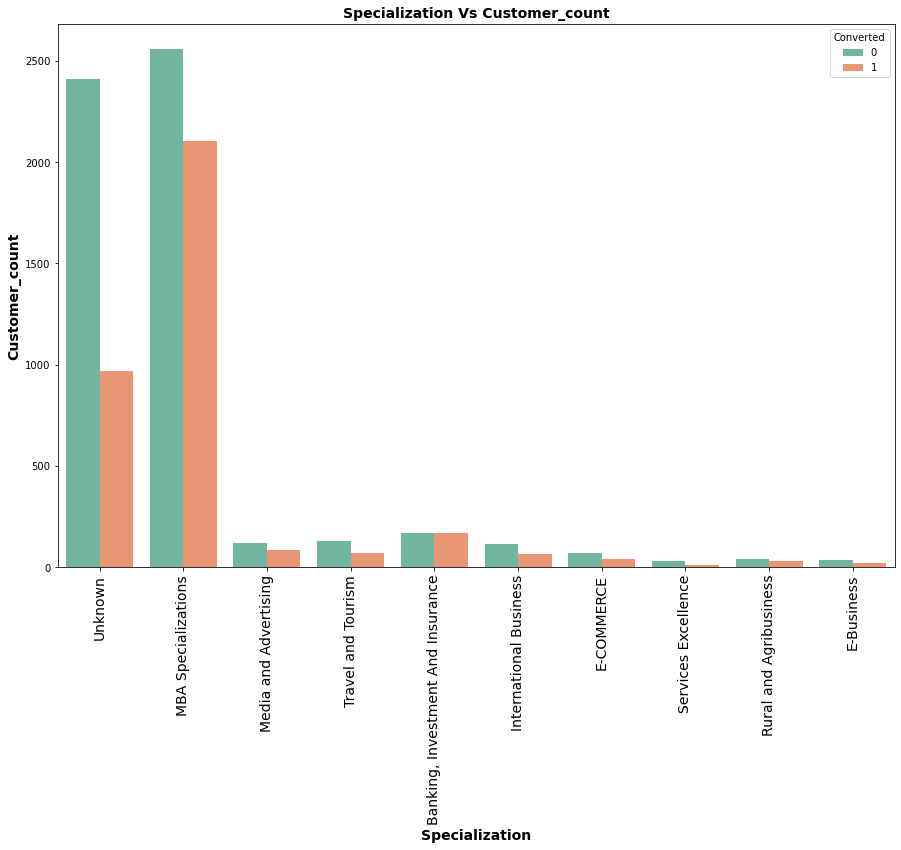

In [54]:
plt.figure(figsize=(15,10))
s1=sns.countplot(leads['Specialization'], hue=leads.Converted,data=leads)
sns.set_palette("Set2")
s1.set_xticklabels(s1.get_xticklabels(),rotation=90,fontsize=14)
plt.xlabel("Specialization",fontdict={'fontsize': 14, 'fontweight': "bold"})
plt.ylabel("Customer_count",fontdict={'fontsize': 14, 'fontweight': "bold"})
plt.title("Specialization Vs Customer_count",fontdict={'fontsize': 14, 'fontweight': "bold"})
plt.show()

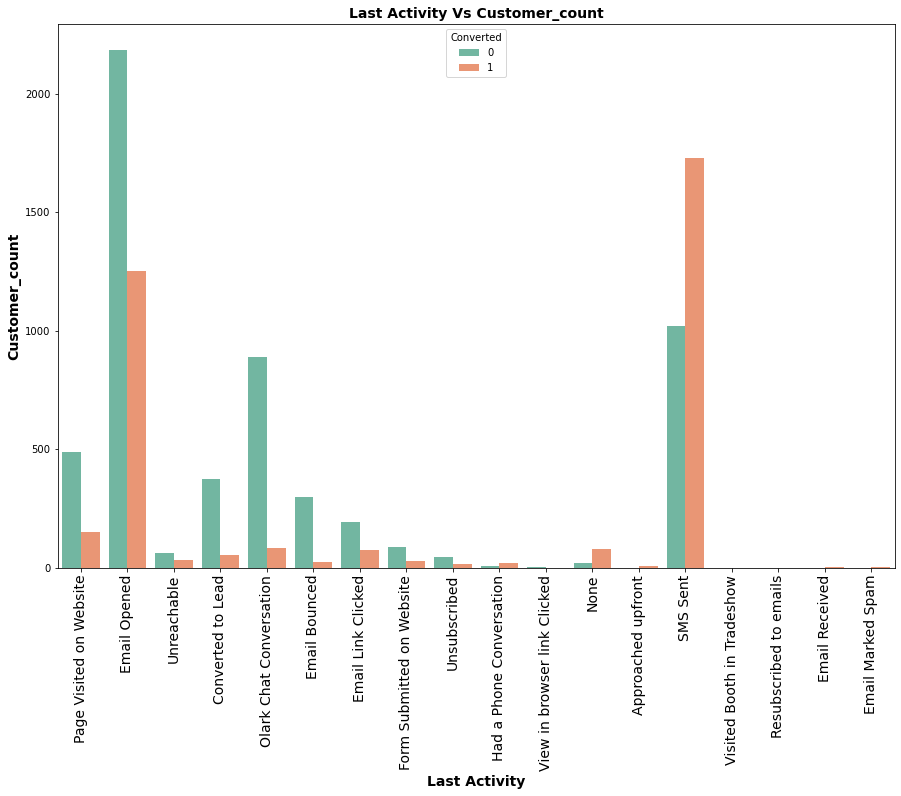

In [55]:
plt.figure(figsize=(15,10))
s1=sns.countplot(leads['Last Activity'], hue=leads.Converted,data=leads)
sns.set_palette("Set3")
s1.set_xticklabels(s1.get_xticklabels(),rotation=90,fontsize=14)
plt.xlabel("Last Activity",fontdict={'fontsize': 14, 'fontweight': "bold"})
plt.ylabel("Customer_count",fontdict={'fontsize': 14, 'fontweight': "bold"})
plt.title("Last Activity Vs Customer_count",fontdict={'fontsize': 14, 'fontweight': "bold"})
plt.show()

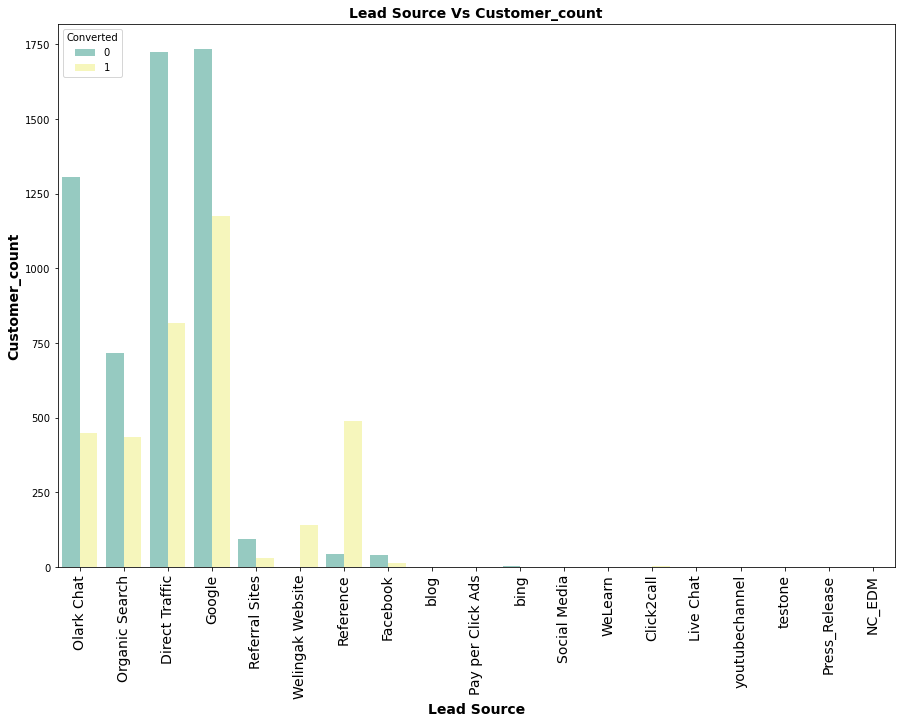

In [56]:
plt.figure(figsize=(15,10))
s1=sns.countplot(leads['Lead Source'], hue=leads.Converted,data=leads)
sns.set_palette("Set2")
s1.set_xticklabels(s1.get_xticklabels(),rotation=90,fontsize=14)
plt.xlabel("Lead Source",fontdict={'fontsize': 14, 'fontweight': "bold"})
plt.ylabel("Customer_count",fontdict={'fontsize': 14, 'fontweight': "bold"})
plt.title("Lead Source Vs Customer_count",fontdict={'fontsize': 14, 'fontweight': "bold"})
plt.show()

#### Working professionals and unemployed people show high conversion rates.
#### People who are tagged “Will revert after reading the email” have been converted compared to others.
#### Customers who have done MBA specializations such as Supply chain, Finance, Healthcare are showing high conversion rate(45.1%) compared to other categories. But among the MBA graduates the non-conversion rate(%) is higher.  
#### People belonging to the banking sector show equal conversion and non-conversion rates.
#### More than 1800 customers for whom the last activity was “SMS sent” were converted.
#### Leads obtained through Google search show a high conversion rate of 39.8% compared to other sources.
#### Though only 142 Leads were obtained from the Welingak website ,all of them have been converted.
#### Most of the leads coming in through reference are also getting converted.


### Treating Binary values

#### It can be seen that the columns 'A free copy of Mastering The Interview','Country' have only two values which can be converted into binary values 0 and 1 for easy analysis.

In [57]:

varlist =  ['A free copy of Mastering The Interview','Country']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0,'India': 1, "Other Countries": 0})

leads[varlist] = leads[varlist].apply(binary_map)

In [58]:
#Checking the head of the columns
leads[['A free copy of Mastering The Interview','Country']].head()

,A free copy of Mastering The Interview,Country
0,0,0
1,0,1
2,1,1
3,0,1
4,0,1


### Converting to the correct datatype

In [59]:
#Converting totalvisits to int type
leads["TotalVisits"]=leads["TotalVisits"].astype(float)
leads["TotalVisits"]=leads["TotalVisits"].astype('int64')

In [60]:
#Converting Page Views Per Visit to int type
leads["Page Views Per Visit"]=leads["Page Views Per Visit"].astype(float)
leads["Page Views Per Visit"]=leads["Page Views Per Visit"].astype('int64')


#### As Lead Number is only an ID of the customer,numerical analysis will not be done on this column.Hence it can be treated as object datatype.

In [61]:
#Converting Lead number to object datatype
leads["Lead Number"]=leads["Lead Number"].astype('object')

## Visualising the numerical columns

<AxesSubplot:xlabel='Total Time Spent on Website'>

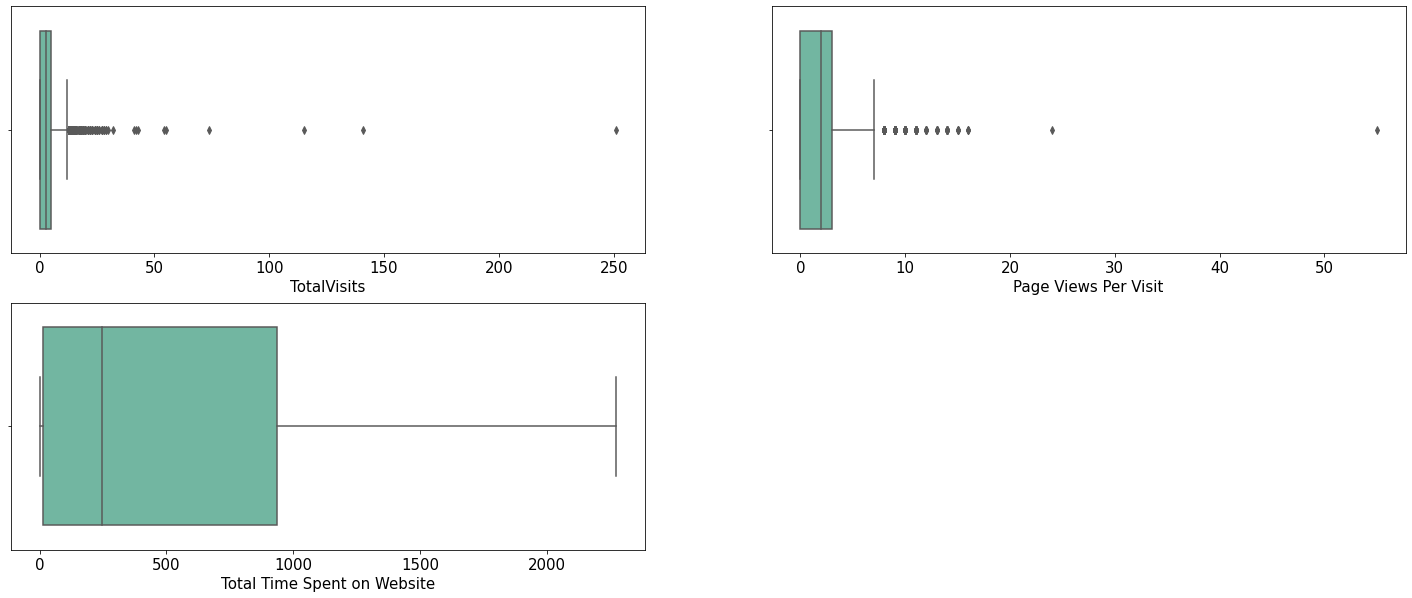

In [62]:
#Plotting the numerical columns
plt.figure(figsize=(25, 10))
plt.rcParams['font.size'] = '15'
plt.subplot(2,2,1)
sns.boxplot(x = 'TotalVisits', data = leads)
plt.subplot(2,2,2)
sns.boxplot(x = 'Page Views Per Visit', data = leads)
plt.subplot(2,2,3)
sns.boxplot(x = 'Total Time Spent on Website', data = leads)

#### Some outliers can be observed in the totalvisits and page views per visit columns.The totalvisits value greater than 100 and page views greater than 50 looks unrealistic.Therefore these rows having outliers can be dropped so that they do not affect our analysis.

In [63]:
#Dropping outliers in these columns
leads.drop(leads[leads['TotalVisits'] >= 100].index, inplace = True)
leads.drop(leads[leads['Page Views Per Visit'] >= 50].index, inplace = True)

In [64]:
leads.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,A free copy of Mastering The Interview
count,9236.000000,9236.000000,9236.000000,9236.000000,9236.000000,9236.000000
mean,0.385448,3.334777,487.770030,2.253032,0.702469,0.312365
std,0.486727,3.615776,548.101541,2.096111,0.457197,0.463483
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,248.000000,2.000000,1.000000,0.000000
75%,1.000000,5.000000,936.000000,3.000000,1.000000,1.000000
max,1.000000,74.000000,2272.000000,24.000000,1.000000,1.000000


#### Thus outliers in the data have been treated.

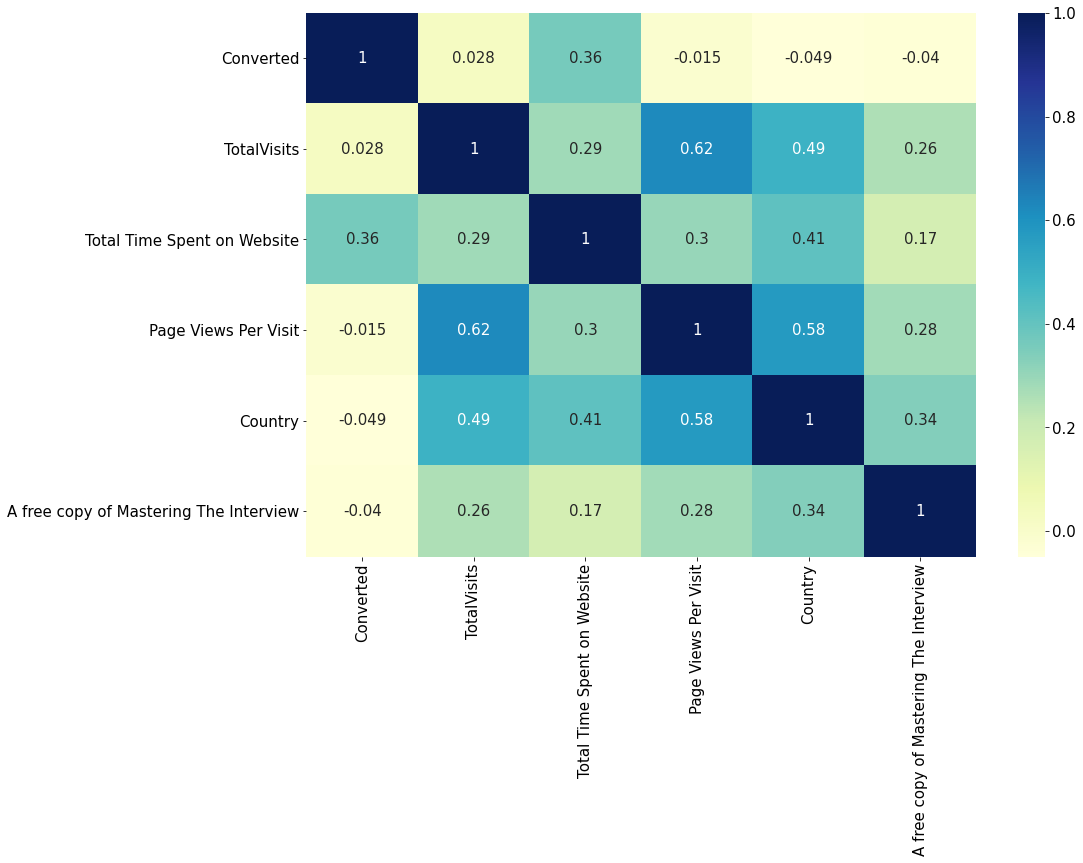

In [65]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (15, 10))
sns.heatmap(leads.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### From the heatmap it can be observed that high correlation does not exist between any of the variables indicating the absence of multicollinearity.It can be seen that the variable "Total time spent on the website" has the highest positive correlation with the target variable indicating that as the customer spends more time on the website,chances of converting him also increases.

## Dummy variable creation

In [66]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(leads[['Lead Source','Lead Origin', 'Last Activity', 'Tags', 'Specialization','What is your current occupation']], drop_first=True)

# Adding the results to the main dataframe
leads = pd.concat([leads, dummy1], axis=1)

In [67]:
#Checking the columns in the df
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9236 entries, 0 to 9239
Data columns (total 78 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   Lead Number                                           9236 non-null   object
 1   Lead Origin                                           9236 non-null   object
 2   Lead Source                                           9236 non-null   object
 3   Converted                                             9236 non-null   int64 
 4   TotalVisits                                           9236 non-null   int64 
 5   Total Time Spent on Website                           9236 non-null   int64 
 6   Page Views Per Visit                                  9236 non-null   int64 
 7   Last Activity                                         9236 non-null   object
 8   Country                                               9236 non-null 

In [68]:
# Dropping the original columns
leads.drop(['Lead Source','Lead Origin', 'Last Activity', 'Tags', 'Specialization','What is your current occupation'], axis = 1, inplace = True)

In [69]:
#Checking the columns
leads.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,A free copy of Mastering The Interview,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Specialization_Unknown,What is your current occupation_Housewife,What is your current occupation_Others,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,660737,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,660728,0,5,674,2,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,660727,1,2,1532,2,1,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,660719,0,1,305,1,1,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,660681,1,2,1428,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0


In [70]:
#Checking the number of rows and columns
leads.shape

(9236, 72)

### Perfoming train-test split

In [71]:
#Creating a dataframe of the dependent variables
X = leads.drop(['Converted','Lead Number'], axis=1)

X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,A free copy of Mastering The Interview,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,...,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Specialization_Unknown,What is your current occupation_Housewife,What is your current occupation_Others,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,5,674,2,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,2,1532,2,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,305,1,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,2,1428,1,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [72]:
#Putting the target variable into y
y = leads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [73]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Scaling the data

In [74]:
scaler = StandardScaler()

X_train[['TotalVisits','Page Views Per Visit','Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits','Page Views Per Visit','Total Time Spent on Website']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,A free copy of Mastering The Interview,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,...,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Specialization_Unknown,What is your current occupation_Housewife,What is your current occupation_Others,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
8412,-0.917804,-0.895783,-1.067584,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3291,-0.917804,-0.895783,-1.067584,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
8068,-0.917804,-0.895783,-1.067584,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
987,-0.640039,0.587007,-0.593290,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
7421,6.581832,-0.510076,-0.118995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [75]:
# Checking the Conversion Rate
Converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Converted

38.54482459939368

#### It can be seen that the conversion rate according to the given dataset is 38.54%.In order to improve this rate we will fit a logistic regression model on the test and train dataset to identify the important variables which impact this rate.

## Model building

In [76]:
#Using the Logistic regression model
logreg = LogisticRegression()

 ### Feature selection using RFE

In [77]:
#Importing RFE and fitting the model
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)            
rfe = rfe.fit(X_train, y_train)

In [78]:
#Checking the rfe output
rfe.support_

array([False,  True, False, False, False, False,  True, False, False,
        True, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
        True,  True, False, False, False, False, False, False, False,
        True, False, False,  True, False, False, False, False, False,
       False, False,  True,  True,  True,  True, False,  True, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False])

In [79]:
#Checking the RFE ranking of the columns
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 38),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 39),
 ('Country', False, 13),
 ('A free copy of Mastering The Interview', False, 41),
 ('Lead Source_Direct Traffic', False, 22),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 27),
 ('Lead Source_Live Chat', False, 48),
 ('Lead Source_NC_EDM', True, 1),
 ('Lead Source_Olark Chat', False, 33),
 ('Lead Source_Organic Search', False, 28),
 ('Lead Source_Pay per Click Ads', False, 49),
 ('Lead Source_Press_Release', False, 45),
 ('Lead Source_Reference', False, 19),
 ('Lead Source_Referral Sites', False, 29),
 ('Lead Source_Social Media', False, 43),
 ('Lead Source_WeLearn', False, 42),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 31),
 ('Lead Source_blog', False, 35),
 ('Lead Source_testone', False, 50),
 ('Lead Source_youtubechannel', False, 55),
 ('Lead Origin_Landing Page Submission', False, 2),
 ('Lead Origin_Lead Add Form', False, 1

In [80]:
#Assigning the selected columns to col
col = X_train.columns[rfe.support_]

In [81]:
#Removing the columns not selected by RFE from Xtrain
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Country',
       'A free copy of Mastering The Interview', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_testone', 'Lead Source_youtubechannel',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation', 'Last Activity_None',
       'Last Activity_Page Visited on Website',
   

In [82]:
#Adding the constant and fitting the logreg model
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6465
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1314.4
Date:                Tue, 12 Apr 2022   Deviance:                       2628.8
Time:                        13:56:45   Pearson chi2:                 7.52e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.7083      0.131    -28.343      0.000      -3.965      -3.452
Total Time Spent on Website                  0.8872      0.052     16.939      0.000       0.785       0.990
Lead Source_Facebook                        -1.1371      0.688     -1.653      0.098      -2.485       0.211
Lead Source_NC_EDM                          26.2152   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Lead Source_Welingak Website                 4.0214      1.040      3.868      0.000       1.983       6.059
Last Activity_Converted to Lead             -1.5445      0.326     -4.742      0.000      -2.183      -0.906
Last Activity_Email Bounced                 -2.3319      0.411     -5.675      0.000      -3.137      -1.527
Last Activity_Olark Chat Conversation       -1.0248      0.230     -4.457      0.000      -1.475      -0.574
Last Activity_SMS Sent                       1.7665      0.116     15.277      0.000       1.540       1.993
Tags_Lateral student                        27.0329   7.46e+04      0.000      1.000   -1.46e+05    1.46e+05
Tags_Lost to others                          7.3749      0.312     23.618      0.000       6.763       7.987
Tags_Next_batch                              4.3025      1.262      3.410      0.001       1.830       6.775
Tags_Not Eligible                          -21.1376   1.71e+04     -0.001      0.999   -3.34e+04    3.34e+04
Tags_Not Specified                           4.1376      0.169     24.547      0.000       3.807       4.468
Tags_Will revert after reading the email     6.6269      0.197     33.677      0.000       6.241       7.013
What is your current occupation_Others      -2.7865      0.146    -19.096      0.000      -3.072      -2.500
============================================================================================================
"""

#### It can be seen that "Lead Source_NC_EDM","Tags_Lateral student","Tags_Not Eligible	" have high p-values which indicate that they are not significant.Hence we will check the VIF values and proceed by dropping one of these columns.

In [83]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

8412    0.999827
3291    0.979970
8068    0.893196
987     0.032897
7421    0.961360
1032    0.974011
8684    0.982303
4318    0.984896
7296    0.085474
712     0.003007
dtype: float64

In [84]:
#Reshaping the values
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.9998266 , 0.97996956, 0.89319621, 0.03289692, 0.96136007,
       0.9740114 , 0.98230299, 0.98489639, 0.08547403, 0.00300678])

In [85]:
#Creating a dataframe of predicted values for y-train
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number
0,1,0.999827,8412
1,1,0.979970,3291
2,1,0.893196,8068
3,0,0.032897,987
4,1,0.961360,7421


In [86]:
#Adding the predicted values to the dataframe with a cutoff of 0.25
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x >0.25 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted
0,1,0.999827,8412,1
1,1,0.979970,3291,1
2,1,0.893196,8068,1
3,0,0.032897,987,0
4,1,0.961360,7421,1


#### Initially we are assuming the cutoff value to be 0.25.

In [87]:
#Creating the confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )

print(confusion)

[[3575  400]
 [ 175 2315]]


In [88]:
#Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9110595514307811


#### We can see that this model has an accuracy of 91.1% which indicates that the model is good.But there are some variables which have very high p-value which means that they are insignificant.The VIF values can be checked to see if the value is high for any of the variables.

In [89]:
#Checking the VIF
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Tags_Not Specified,4.74
14,What is your current occupation_Others,4.40
7,Last Activity_SMS Sent,1.43
13,Tags_Will revert after reading the email,1.35
6,Last Activity_Olark Chat Conversation,1.19
0,Total Time Spent on Website,1.13
3,Lead Source_Welingak Website,1.13
9,Tags_Lost to others,1.05
5,Last Activity_Email Bounced,1.04
4,Last Activity_Converted to Lead,1.03


#### We can see that the VIF values for all the features are below 5.But the p-value for the feature Tags_Lateral Student is 1.0 which makes it insignificant.Hence we will drop this column and check the model again.

In [90]:
#Dropping the insignificant column
col = col.drop('Tags_Lateral student')
col

Index(['Total Time Spent on Website', 'Lead Source_Facebook',
       'Lead Source_NC_EDM', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Tags_Lost to others', 'Tags_Next_batch', 'Tags_Not Eligible',
       'Tags_Not Specified', 'Tags_Will revert after reading the email',
       'What is your current occupation_Others'],
      dtype='object')

In [91]:
#Re-fitting the model
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6465
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1321.8
Date:                Tue, 12 Apr 2022   Deviance:                       2643.6
Time:                        13:56:45   Pearson chi2:                 7.48e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.6837      0.130    -28.394      0.000      -3.938      -3.429
Total Time Spent on Website                  0.8796      0.052     16.862      0.000       0.777       0.982
Lead Source_Facebook                        -1.1436      0.687     -1.664      0.096      -2.490       0.203
Lead Source_NC_EDM                          26.2252   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Lead Source_Welingak Website                 4.0165      1.040      3.863      0.000       1.979       6.054
Last Activity_Converted to Lead             -1.5409      0.325     -4.738      0.000      -2.178      -0.903
Last Activity_Email Bounced                 -2.3254      0.410     -5.668      0.000      -3.130      -1.521
Last Activity_Olark Chat Conversation       -1.0242      0.230     -4.460      0.000      -1.474      -0.574
Last Activity_SMS Sent                       1.7782      0.115     15.416      0.000       1.552       2.004
Tags_Lost to others                          7.3489      0.312     23.573      0.000       6.738       7.960
Tags_Next_batch                              4.2724      1.261      3.388      0.001       1.801       6.744
Tags_Not Eligible                          -21.1584   1.71e+04     -0.001      0.999   -3.35e+04    3.34e+04
Tags_Not Specified                           4.1080      0.168     24.507      0.000       3.779       4.437
Tags_Will revert after reading the email     6.5984      0.196     33.668      0.000       6.214       6.982
What is your current occupation_Others      -2.7853      0.146    -19.098      0.000      -3.071      -2.499
============================================================================================================
"""

In [92]:
#Checking the VIF
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Tags_Not Specified,4.74
13,What is your current occupation_Others,4.40
7,Last Activity_SMS Sent,1.43
12,Tags_Will revert after reading the email,1.35
6,Last Activity_Olark Chat Conversation,1.19
0,Total Time Spent on Website,1.13
3,Lead Source_Welingak Website,1.13
8,Tags_Lost to others,1.05
5,Last Activity_Email Bounced,1.04
4,Last Activity_Converted to Lead,1.03


#### We can see that the feature "Lead Source_NC_EDM" has high p-value of 1.0 which means that this feature is insignificant and hence we will drop this column.

In [93]:
#Dropping the insignificant column
col = col.drop("Lead Source_NC_EDM")
col

Index(['Total Time Spent on Website', 'Lead Source_Facebook',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent', 'Tags_Lost to others', 'Tags_Next_batch',
       'Tags_Not Eligible', 'Tags_Not Specified',
       'Tags_Will revert after reading the email',
       'What is your current occupation_Others'],
      dtype='object')

In [94]:
#Fitting the model
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6465
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1323.6
Date:                Tue, 12 Apr 2022   Deviance:                       2647.2
Time:                        13:56:45   Pearson chi2:                 7.47e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.6806      0.130    -28.397      0.000      -3.935      -3.427
Total Time Spent on Website                  0.8807      0.052     16.890      0.000       0.778       0.983
Lead Source_Facebook                        -1.1443      0.687     -1.666      0.096      -2.491       0.202
Lead Source_Welingak Website                 4.0166      1.040      3.863      0.000       1.979       6.054
Last Activity_Converted to Lead             -1.5447      0.325     -4.752      0.000      -2.182      -0.908
Last Activity_Email Bounced                 -2.3290      0.410     -5.678      0.000      -3.133      -1.525
Last Activity_Olark Chat Conversation       -1.0282      0.229     -4.480      0.000      -1.478      -0.578
Last Activity_SMS Sent                       1.7726      0.115     15.389      0.000       1.547       1.998
Tags_Lost to others                          7.3449      0.312     23.571      0.000       6.734       7.956
Tags_Next_batch                              4.2716      1.261      3.388      0.001       1.800       6.743
Tags_Not Eligible                          -21.1611   1.71e+04     -0.001      0.999   -3.35e+04    3.34e+04
Tags_Not Specified                           4.1076      0.168     24.510      0.000       3.779       4.436
Tags_Will revert after reading the email     6.5970      0.196     33.670      0.000       6.213       6.981
What is your current occupation_Others      -2.7799      0.146    -19.076      0.000      -3.065      -2.494
============================================================================================================
"""

#### It can be observed that there are two features Tags_Not Eligible and Lead Source_Facebook have p-values as 0.999 and 0.095 which indicate that they are insignificant.We will go further and check the VIF value to see if these columns should be dropped.

In [95]:
#Checking the VIF
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Tags_Not Specified,4.74
12,What is your current occupation_Others,4.40
6,Last Activity_SMS Sent,1.43
11,Tags_Will revert after reading the email,1.35
5,Last Activity_Olark Chat Conversation,1.19
0,Total Time Spent on Website,1.13
2,Lead Source_Welingak Website,1.13
7,Tags_Lost to others,1.05
4,Last Activity_Email Bounced,1.04
3,Last Activity_Converted to Lead,1.03


#### The VIF value is low but the value of p is high and hence we will drop one feature "Tags_Not Eligible"

In [96]:
#Dropping the insignificant column
col = col.drop("Tags_Not Eligible")
col

Index(['Total Time Spent on Website', 'Lead Source_Facebook',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent', 'Tags_Lost to others', 'Tags_Next_batch',
       'Tags_Not Specified', 'Tags_Will revert after reading the email',
       'What is your current occupation_Others'],
      dtype='object')

In [97]:
#Re-fitting the model
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6465
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1325.4
Date:                Tue, 12 Apr 2022   Deviance:                       2650.9
Time:                        13:56:45   Pearson chi2:                 7.53e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.7036      0.129    -28.647      0.000      -3.957      -3.450
Total Time Spent on Website                  0.8791      0.052     16.877      0.000       0.777       0.981
Lead Source_Facebook                        -1.1448      0.687     -1.666      0.096      -2.492       0.202
Lead Source_Welingak Website                 4.0160      1.040      3.863      0.000       1.978       6.054
Last Activity_Converted to Lead             -1.5395      0.325     -4.733      0.000      -2.177      -0.902
Last Activity_Email Bounced                 -2.3242      0.410     -5.665      0.000      -3.128      -1.520
Last Activity_Olark Chat Conversation       -1.0247      0.230     -4.464      0.000      -1.475      -0.575
Last Activity_SMS Sent                       1.7825      0.115     15.483      0.000       1.557       2.008
Tags_Lost to others                          7.3669      0.312     23.648      0.000       6.756       7.977
Tags_Next_batch                              4.2906      1.261      3.401      0.001       1.818       6.763
Tags_Not Specified                           4.1270      0.168     24.639      0.000       3.799       4.455
Tags_Will revert after reading the email     6.6173      0.196     33.789      0.000       6.233       7.001
What is your current occupation_Others      -2.7810      0.146    -19.076      0.000      -3.067      -2.495
============================================================================================================
"""

#### The p-value is high for Lead Source_Facebook and hence can be dropped.

In [98]:
#Checking the VIF again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Tags_Not Specified,4.74
11,What is your current occupation_Others,4.40
6,Last Activity_SMS Sent,1.43
10,Tags_Will revert after reading the email,1.35
5,Last Activity_Olark Chat Conversation,1.19
0,Total Time Spent on Website,1.13
2,Lead Source_Welingak Website,1.13
7,Tags_Lost to others,1.05
4,Last Activity_Email Bounced,1.04
3,Last Activity_Converted to Lead,1.02


In [99]:
#Dropping the insignificant column
col = col.drop("Lead Source_Facebook")
col

Index(['Total Time Spent on Website', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Tags_Lost to others', 'Tags_Next_batch', 'Tags_Not Specified',
       'Tags_Will revert after reading the email',
       'What is your current occupation_Others'],
      dtype='object')

In [100]:
#Re-fitting the model
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6465
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1326.9
Date:                Tue, 12 Apr 2022   Deviance:                       2653.8
Time:                        13:56:45   Pearson chi2:                 7.51e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.7066      0.129    -28.699      0.000      -3.960      -3.453
Total Time Spent on Website                  0.8820      0.052     16.944      0.000       0.780       0.984
Lead Source_Welingak Website                 4.0339      1.039      3.881      0.000       1.997       6.071
Last Activity_Converted to Lead             -1.5320      0.325     -4.711      0.000      -2.169      -0.895
Last Activity_Email Bounced                 -2.3144      0.410     -5.639      0.000      -3.119      -1.510
Last Activity_Olark Chat Conversation       -1.0140      0.229     -4.422      0.000      -1.463      -0.565
Last Activity_SMS Sent                       1.7793      0.115     15.472      0.000       1.554       2.005
Tags_Lost to others                          7.3637      0.311     23.667      0.000       6.754       7.973
Tags_Next_batch                              4.2952      1.262      3.404      0.001       1.822       6.768
Tags_Not Specified                           4.1133      0.167     24.630      0.000       3.786       4.441
Tags_Will revert after reading the email     6.6102      0.195     33.819      0.000       6.227       6.993
What is your current occupation_Others      -2.7699      0.145    -19.050      0.000      -3.055      -2.485
============================================================================================================
"""

In [101]:
#Checking the VIF again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Tags_Not Specified,4.74
10,What is your current occupation_Others,4.40
5,Last Activity_SMS Sent,1.43
9,Tags_Will revert after reading the email,1.35
4,Last Activity_Olark Chat Conversation,1.19
1,Lead Source_Welingak Website,1.13
0,Total Time Spent on Website,1.12
6,Tags_Lost to others,1.05
3,Last Activity_Email Bounced,1.04
2,Last Activity_Converted to Lead,1.02


#### We can see that the p-values are low for all the features and VIF values also look good.So we can proceed and check the metrics for this model.

In [102]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

8412    0.999830
3291    0.980019
8068    0.892204
987     0.033005
7421    0.961103
1032    0.973548
8684    0.982506
4318    0.984909
7296    0.086820
712     0.003060
dtype: float64

In [103]:
#Creating a dataframe of predicted values and converted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number
8412,1,0.999830,8412
3291,1,0.980019,3291
8068,1,0.892204,8068
987,0,0.033005,987
7421,1,0.961103,7421


In [104]:
#Adding the predicted column and checking the df
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.25 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted
8412,1,0.999830,8412,1
3291,1,0.980019,3291,1
8068,1,0.892204,8068,1
987,0,0.033005,987,0
7421,1,0.961103,7421,1


### Model evaluation

In [105]:
#Creating the confusion matrix
conf_matrix = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
conf_matrix

array([[3572,  403],
       [ 180, 2310]], dtype=int64)

In [106]:
#Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9098221191028616


In [107]:
TP = conf_matrix[1,1] # true positive 
TN = conf_matrix[0,0] # true negatives
FP = conf_matrix[0,1] # false positives
FN = conf_matrix[1,0] # false negatives


In [108]:
# Calculating sensitivity
TP / float(TP+FN)

0.927710843373494

In [109]:
#calculating specificity
TN / float(TN+FP)

0.8986163522012579

In [110]:
# Calculation false postive rate
print(FP/ float(TN+FP))

0.10138364779874214


In [111]:
# positive predictive value 
print (TP / float(TP+FP))

0.8514559528197567


In [112]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9520255863539445


#### We can see that the accuracy is 90.98% which has not changed much from the initial model indicating that the performance is good.The sensitivity is 92.7% indicating that the model is correctly predicting true positive values and specificity is 89.8% indicating it is correctly classified the true negative values.

### Plotting the ROC curve

In [113]:
#Creating the function to plot the ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [114]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

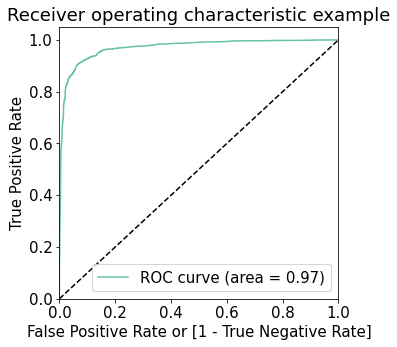

In [115]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

#### The ROC curve follows the left hand border and the top border of the ROC space indicating that the test is accurate.Sensitivity of the model is increasing with decrease in specificity.Thus the performance of the model is good with accurate prediction.

## Finding Optimal Cutoff Point


In [116]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
8412,1,0.999830,8412,1,1,1,1,1,1,1,1,1,1,1
3291,1,0.980019,3291,1,1,1,1,1,1,1,1,1,1,1
8068,1,0.892204,8068,1,1,1,1,1,1,1,1,1,1,0
987,0,0.033005,987,0,1,0,0,0,0,0,0,0,0,0
7421,1,0.961103,7421,1,1,1,1,1,1,1,1,1,1,1


In [117]:
# calculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.385151     1.000000     0.000000
0.1          0.1  0.865275     0.967068     0.801509
0.2          0.2  0.895901     0.950201     0.861887
0.3          0.3  0.917711     0.917269     0.917987
0.4          0.4  0.924362     0.901205     0.938868
0.5          0.5  0.920959     0.865060     0.955975
0.6          0.6  0.921887     0.849398     0.967296
0.7          0.7  0.918020     0.829719     0.973333
0.8          0.8  0.911833     0.804819     0.978868
0.9          0.9  0.875638     0.698394     0.986667


#### It can be observed that the accuracy,sensitivity and specificity values are almost the same at a cutoff of 0.3 which is the optimal cutoff point.

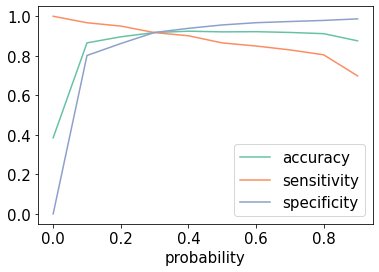

In [118]:
#Plottingaccuracy,sensitivity and specificity to find the cutoff
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

#### From the graph,it is clear that the three curves intersect at 0.3 which is the optimal cutoff point.Hence we can fix 0.3 as the optimal cutoff and find the final predicted values on the train set.

In [119]:
#Finding the final predicted values and adding them to the dataframe
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
8412,1,0.999830,8412,1,1,1,1,1,1,1,1,1,1,1,1
3291,1,0.980019,3291,1,1,1,1,1,1,1,1,1,1,1,1
8068,1,0.892204,8068,1,1,1,1,1,1,1,1,1,1,0,1
987,0,0.033005,987,0,1,0,0,0,0,0,0,0,0,0,0
7421,1,0.961103,7421,1,1,1,1,1,1,1,1,1,1,1,1


In [120]:
#Calculating the Lead_Score and assigning them
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_Prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
8412,1,0.999830,8412,1,1,1,1,1,1,1,1,1,1,1,1,100
3291,1,0.980019,3291,1,1,1,1,1,1,1,1,1,1,1,1,98
8068,1,0.892204,8068,1,1,1,1,1,1,1,1,1,1,0,1,89
987,0,0.033005,987,0,1,0,0,0,0,0,0,0,0,0,0,3
7421,1,0.961103,7421,1,1,1,1,1,1,1,1,1,1,1,1,96


#### The lead scores for each lead has been assigned based on the converted probability.

In [121]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9177107501933488

#### Thus based on the optimal cutoff value 0.3 it can be seen that the model is performing well on the train set with an accuracy of 91.7%.

In [122]:
#Creating the confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3649,  326],
       [ 206, 2284]], dtype=int64)

In [123]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives
confusion2

array([[3649,  326],
       [ 206, 2284]], dtype=int64)

In [124]:
# Calculating sensitivity
TP / float(TP+FN)

0.9172690763052209

In [125]:
#calculating specificity
TN / float(TN+FP)

0.9179874213836478

#### It can be seen that the sensitivity and specificity values have also not altered much from the previous model.

### Precision and Recall

In [126]:
#Creating
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion

array([[3649,  326],
       [ 206, 2284]], dtype=int64)

In [127]:
#Precision
precision=confusion[1,1]/(confusion[0,1]+confusion[1,1])
precision

0.8750957854406131

In [128]:
#recall
recall=confusion[1,1]/(confusion[1,0]+confusion[1,1])
recall

0.9172690763052209

In [129]:
#Calculating f1 score
F1 = 2 * (precision * recall) / (precision + recall)
F1

0.895686274509804

#### The model has a precision value of 87.5% and recall value of 91.7%.Since recall is higher,it indicates that the percentage of total relevant results classified by the algorithm is high.

#### The F1 score of the model is 0.89 which is close to 1 indicating that the model is good.

In [130]:
#Plotting the precision recall curve
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

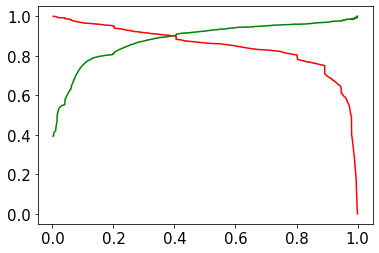

In [131]:
#Plotting the curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### The curve shows high recall indicating the accuracy of prediction is high.

## Making predictions on the test set

### Scaling the data

In [132]:
#Scaling the data
X_test[['TotalVisits','Page Views Per Visit','Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits','Page Views Per Visit','Total Time Spent on Website']])

In [133]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Tags_Lost to others,Tags_Next_batch,Tags_Not Specified,Tags_Will revert after reading the email,What is your current occupation_Others
343,-0.792079,0,0,0,0,0,0,0,1,0,1
8371,-0.877589,0,0,0,0,0,0,0,1,0,1
1640,-0.757511,0,0,0,0,0,0,0,0,0,0
1949,-0.895783,0,0,0,0,1,0,0,1,0,1
3673,-0.235350,0,0,0,0,0,0,0,0,0,0


In [134]:
#Adding the constant
X_test_sm = sm.add_constant(X_test)

In [135]:
#Predicting the values on the test set
y_test_pred = res.predict(X_test_sm)

In [136]:
#Creating a dataframe
y_pred_1 = pd.DataFrame(y_test_pred)

In [137]:
#Creating the ytest df
y_test_df = pd.DataFrame(y_test)

In [138]:
# Making Lead Number the index of the df
y_test_df['Lead Number'] = y_test_df.index

In [139]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [140]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [141]:
#Checking the final predicted dataframe
y_pred_final.head()

,Converted,Lead Number,0
0,0,343,0.044707
1,0,8371,0.041594
2,0,1640,0.012435
3,1,1949,0.201973
4,0,3673,0.019566


In [142]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [143]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Lead Number','Converted','Converted_Prob'], axis=1)

In [144]:
#Checking the head of the final predicted dataset
y_pred_final.head()

,Lead Number,Converted,Converted_Prob
0,343,0,0.044707
1,8371,0,0.041594
2,1640,0,0.012435
3,1949,1,0.201973
4,3673,0,0.019566


In [145]:
#Setting the cutoff as 0.3
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [146]:
#Checking the final dataframe
y_pred_final

,Lead Number,Converted,Converted_Prob,final_predicted
0,343,0,0.044707,0
1,8371,0,0.041594,0
2,1640,0,0.012435,0
3,1949,1,0.201973,0
4,3673,0,0.019566,0
...,...,...,...,...
2766,1871,0,0.011023,0
2767,4698,0,0.011895,0
2768,4124,0,0.069674,0
2769,6863,1,0.941187,1


### Calculating the various metrics

In [147]:
# Checking the accuracy of the test set
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9162757127390834

In [148]:
conf2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted)
conf2


array([[1556,  145],
       [  87,  983]], dtype=int64)

In [149]:
# Substituting the value of true positive
TP1 = conf2[1,1]
# Substituting the value of true negatives
TN1 = conf2[0,0]
# Substituting the value of false positives
FP1 = conf2[0,1] 
# Substituting the value of false negatives
FN1 = conf2[1,0]

In [150]:
# Calculating sensitivity
TP1 / float(TP1+FN1)

0.9186915887850468

In [151]:
#calculating specificity
TN1 / float(TN1+FP1)

0.914756025867137

In [152]:
#calculating precision
Precision_test = TP1 / (TP1 + FP1)
Precision_test

0.8714539007092199

In [153]:
#Calculating Recall
Recall_test = TP1 / (TP1 + FN1)
Recall_test

0.9186915887850468

In [154]:
#Calculating f1 score
F1_test = 2 * (Precision_test * Recall_test) / (Precision_test + Recall_test)
F1

0.895686274509804

#### We can observe that the accuracy of model prediction on the test set is 91.6% which is almost similar to the train set.The sensitivity,specificity and recall values are 91.8%,91.4% and 91.8% indicating that the algorithm is doing a good job of predicting a high percentage of correct values.

In [155]:
#Calculating and including the lead score column
y_pred_final['Lead_Score'] = y_pred_final.Converted_Prob.map( lambda x: round(x*100))

y_pred_final.head(20)

,Lead Number,Converted,Converted_Prob,final_predicted,Lead_Score
0,343,0,0.044707,0,4
1,8371,0,0.041594,0,4
2,1640,0,0.012435,0,1
3,1949,1,0.201973,0,20
4,3673,0,0.019566,0,2
5,5690,0,0.011914,0,1
6,8072,1,0.980019,1,98
7,8334,1,0.801538,1,80
8,349,0,0.004027,0,0
9,9225,0,0.001239,0,0


#### The lead score for each entry in the test set has been calculated from the converted probability in the above table.A high score close to 100 indicates a hot lead and a low score indicates a cold lead which will not get converted.

#### INFERENCE
#### The top features which may contribute to the conversion rate are,
     - Total time spent on the website
     - Lead source Welingak website
     - Last Activity-SMS sent
#### The company should concentrate on customers
     - With MBA specializations
     - who are unemployed or working professionals
     - who have spent more time on the website.
     - who have been tagged “Will revert after reading the mail”
#### To attract more customers the company can concentrate on 
     - sources like the Welingak website and Google
     - References by existing customers
